# Posttest 6 : Unsupervised Learning
# Nama : Adlina Safa Sephia Putri
# Kelas : 2109106021

In [33]:
import pandas as pd
import seaborn as sns
import warnings

In [34]:
warnings.filterwarnings('ignore')

# Unsupervised Learning
Buatlah model Machine Learning menggunakan pendekatan Unupervised Learning dengan ketentuan sebagai berikut:
1. Gunakan salah satu algoritma pada Unsupervised Learning.
2. Tampilkan visualisasi dari model tersebut.

In [35]:
df = pd.read_csv('housing.csv')

In [36]:
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,num_ingredients
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,129.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1106.0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,190.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,235.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,280.0


## Subset & Data Scalling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
df_subset = df[['total_rooms', 'total_bedrooms']]

In [39]:
ss = StandardScaler()

In [40]:
x_scaled = ss.fit_transform(df_subset)

## K-Means Clustering

In [41]:
from sklearn.cluster import KMeans

In [42]:
model_kmeans = KMeans(n_clusters = 3)

In [43]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [44]:
labels = model_kmeans.labels_

In [45]:
print(labels)

[1 0 1 ... 1 1 1]


## Buat Cross_Tab untuk membandingkan antar cluster

In [46]:
df_kmeans = pd.DataFrame({'labels' : labels, 'ocean_proximity' : df.ocean_proximity})

In [47]:
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['ocean_proximity'])

In [48]:
print(ct1)

ocean_proximity  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
labels                                                          
0                     2104    1436       0       506         632
1                     6853    4918       5      1751        1990
2                      179     197       0        33          36


## Melihat Centroid

In [49]:
import matplotlib.pyplot as plt

In [50]:
plt.style.use('ggplot')

In [51]:
## untuk mengambil semua baris pada kolom tertentu (berbentuk array)
xs = x_scaled[:,0]
ys = x_scaled[:,1]

In [52]:
# menampung koordinat dari semua centroid
centroid = model_kmeans.cluster_centers_

In [53]:
# pisahkan centroid koordinat x dan koordinat y
centroids_x = centroid[:,0]
centroids_y = centroid[:,1]

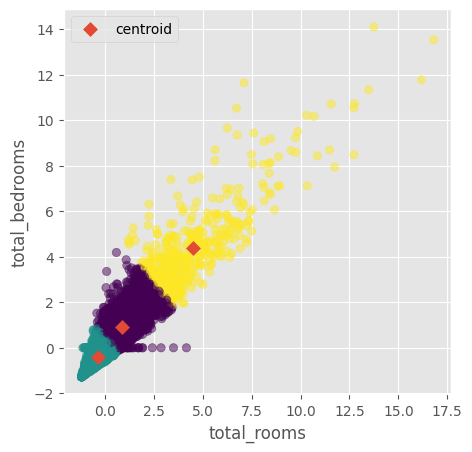

In [54]:
# Visualisasi Cluster
plt.figure(figsize=(5,5))

# Titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, alpha=0.5, c = labels)

# titik-titik centroid
plt.scatter(centroids_x, centroids_y, label = "centroid", marker="D", s=50)

# Beri label
plt.xlabel("total_rooms")
plt.ylabel("total_bedrooms")

plt.legend()
plt.show()

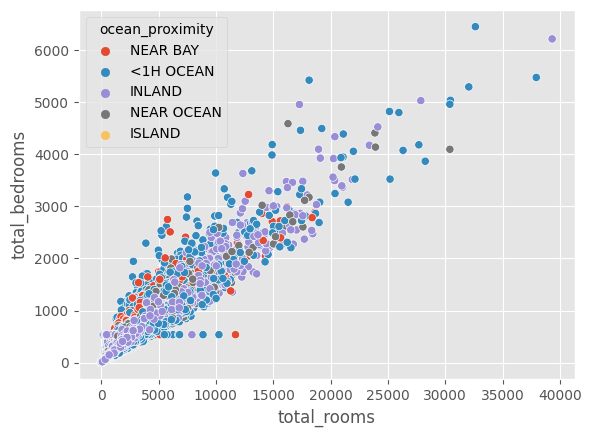

In [55]:
# label aktual
df_aktual = df[["total_rooms", "total_bedrooms", "ocean_proximity"]]
sns.scatterplot(x = "total_rooms", y = "total_bedrooms", data = df_aktual, hue = "ocean_proximity")
plt.show()

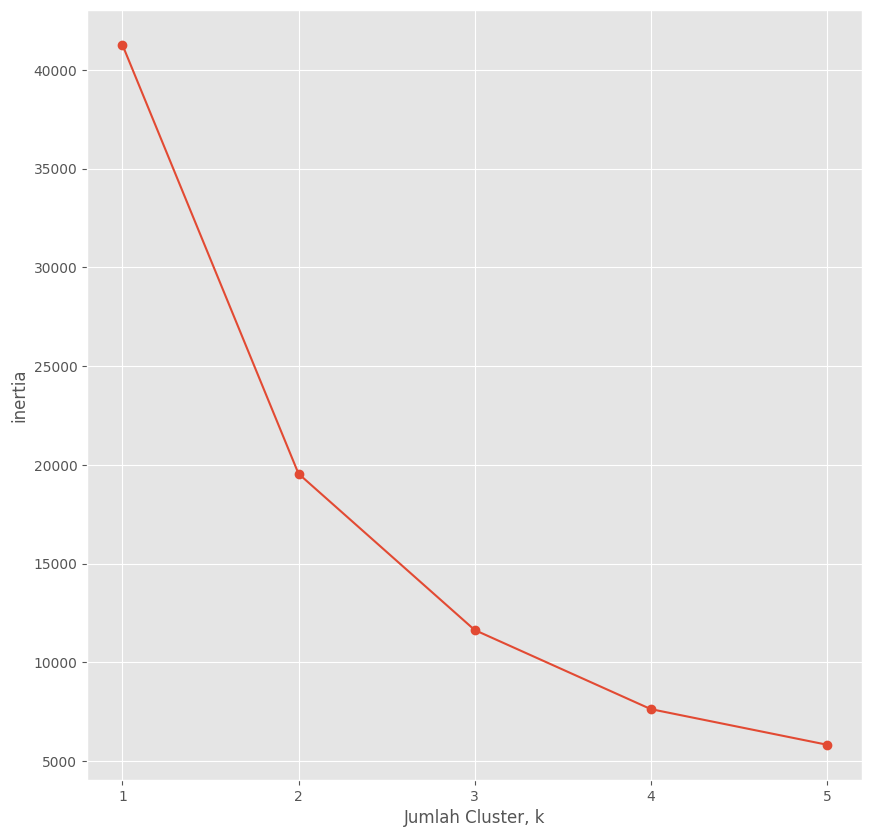

In [56]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

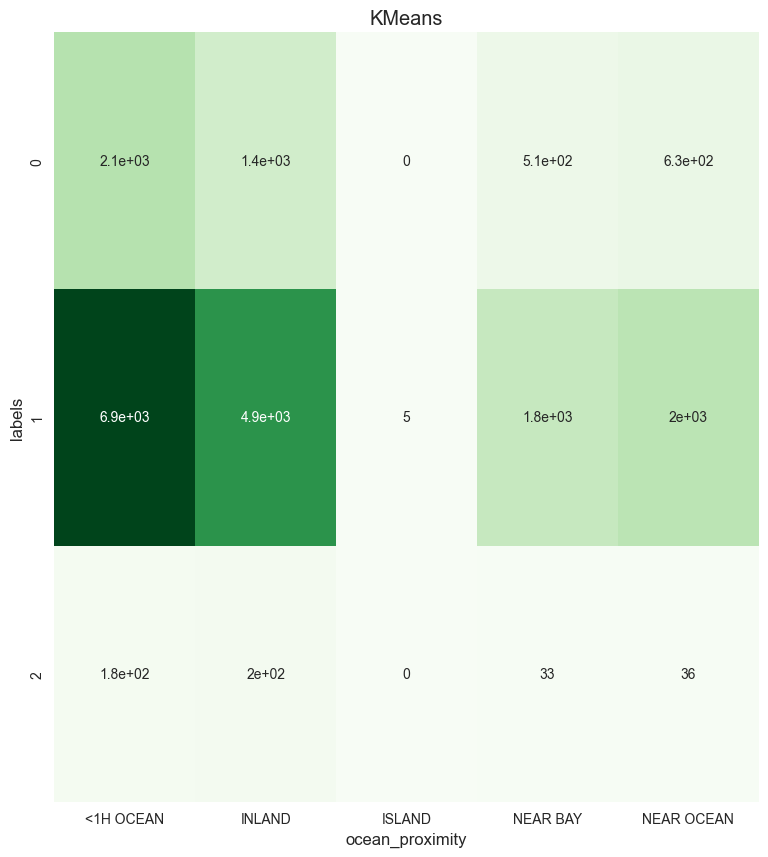

In [66]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1, annot=True, cbar=False, cmap="Greens")
plt.show()